**M916 - Machine Learning
Coursework 3 CONVOLUTIONAL NEUTRAL NETWORK**

**2. CONVOLUTIONAL NEUTRAL NETWORK**

In [174]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical #one hot encoding
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

*LOAD AND NORMALIZE DATASET 'MNIST'*

In [175]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #load data and split them into train and test set

*RESHAPE AND NORMALIZE DATASET MNIST*



In [176]:
train_images= train_images.reshape(-1,28,28,1) #60000x28x28 x1
test_images=test_images.reshape(-1,28,28,1)

train_images.astype('float32') #make them float numbers
test_images.astype('float32')
train_images, test_images = train_images / 255 , test_images / 255 # normalize data to the range 0-1

train_labels= to_categorical(train_labels) #one hot encoding
test_labels= to_categorical(test_labels)

*Build a model*
- A convolutional layer with 63 kernels
- A convolutional layer with 32 kernels
- A flatten layer
- A fully connected layer with 128 neurons
- A dropout layer
- A fully connected layer with 10 neurons (1 per class)

In [177]:
model_conv= models.Sequential()
model_conv.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(28, 28,1)))
#model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model_conv.add(layers.MaxPooling2D((2, 2)))
model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(128, activation='relu'))
model_conv.add(layers.Dropout(0.3)) #for overfitting
model_conv.add(layers.Dense(10, activation='softmax'))

model_conv.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_16 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               2359424   
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total params: 2,379,818
Trainable params: 2,379,818
Non-trainable params: 0
___________________________________________

*Compile and train CNN model*

In [178]:
opt= keras.optimizers.Adam(learning_rate=0.001) #fixing learning rate value
model_conv.compile(loss= 'categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model_conv.fit (train_images, train_labels, epochs=20, batch_size=120, validation_split=0.1)

Epoch 1/20
450/450 [==============================] - 4s 9ms/step - loss: 0.1896 - accuracy: 0.9417 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 2/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0409 - val_accuracy: 0.9878
Epoch 3/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0424 - val_accuracy: 0.9888
Epoch 4/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0351 - val_accuracy: 0.9908
Epoch 5/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.0363 - val_accuracy: 0.9910
Epoch 6/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0421 - val_accuracy: 0.9887
Epoch 7/20
450/450 [==============================] - 4s 8ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0367 - val_accuracy: 0.9923
Epoch 

*Evaluate the model using test set*

In [179]:
test_loss, test_acc= model_conv.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9892


*Plot accuracy and loss for train and validation set*


In [180]:
import matplotlib.pyplot as plt

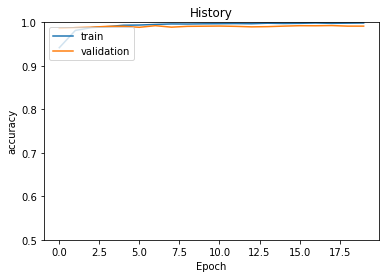

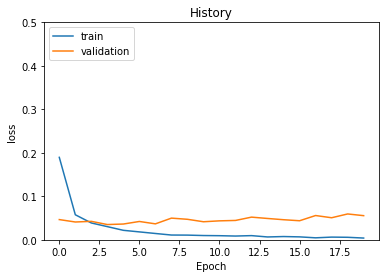

In [181]:
def show_train_history ( history , train , validation ):

  plt . plot ( history . history [ train ])
  plt . plot ( history . history [ validation])
  plt . title ('History')
  plt . ylabel ( train )
  plt . xlabel ('Epoch')
  plt . legend ([ 'train', 'validation'], loc ='upper left')
  if train=='accuracy' and validation=='val_accuracy':
      plt.ylim([0.70, 1])
  else:
      plt.ylim([0, 0.5])

  plt . show ()

show_train_history ( history ,'accuracy', 'val_accuracy') 
show_train_history ( history ,'loss', 'val_loss') 

In [182]:
print(test_acc)

0.9891999959945679


*Confusion Matrix for CNN*

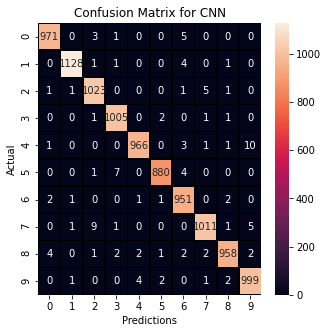

In [183]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

y_test_arg=np.argmax(test_labels,axis=1)
Y_pred = np.argmax(model_conv.predict(test_images),axis=1)
confusion=confusion_matrix(y_test_arg, Y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion,annot = True, linewidths=0.5,linecolor="black",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.title("Confusion Matrix for CNN")
plt.show()


*Visualise 5 random pictures with their predictions*
(just for a trial)

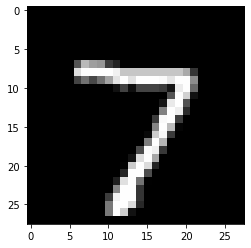

Model prediction: 7


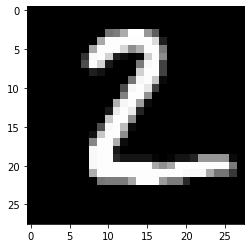

Model prediction: 2


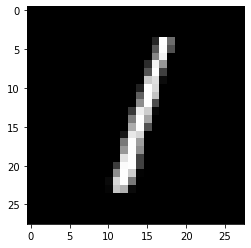

Model prediction: 1


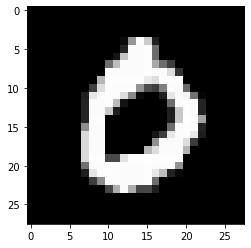

Model prediction: 0


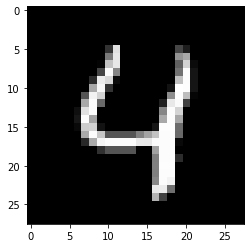

Model prediction: 4


In [184]:
n_images = 5
test_images = test_images[:n_images]
predictions = model_conv(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))